### [Loading libraries](#1)<a id="1"></a> <br>

In [1]:
# Loading all libraries
from datetime import datetime
start_time = datetime.now()
# %pip install xgboost
# %pip install imblearn
# %pip install openpyxl

# pip install keras
# pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
import time
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
from scipy import stats

print('LOAD DURATION:',datetime.now() - start_time)

LOAD DURATION: 0:00:01.963532


### [Loading Data](#2)<a id="2"></a> <br>

In [2]:
%%time 
# loading the dataset
data = pd.read_csv('Data/NY property data.csv')
print('data set is loaded !')

data set is loaded !
CPU times: user 3.35 s, sys: 345 ms, total: 3.69 s
Wall time: 3.78 s


In [3]:
data.describe()

,RECORD,B,BLOCK,LOT,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,...,EXTOT,EXCD1,ZIP,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.014730e+06,1.070994e+06,1.070994e+06,1.070994e+06,...,1.070994e+06,638488.000000,1.041104e+06,1.070994e+06,1.070994e+06,2.827260e+05,2.827320e+05,8.744900e+04,1.308280e+05,92948.000000
mean,5.354975e+05,3.215427e+00,4.757239e+03,3.647221e+02,3.663530e+01,8.886159e+01,5.006918e+00,8.742645e+05,8.506792e+04,2.272382e+05,...,9.118698e+04,1602.014232,1.092396e+04,2.304277e+01,3.992284e+01,2.462357e+05,7.139114e+05,3.512357e+05,6.567683e+05,1364.041679
std,3.091695e+05,1.201197e+00,3.676579e+03,8.532152e+02,7.403284e+01,7.639628e+01,8.365707e+00,1.158243e+07,4.057260e+06,6.877529e+06,...,6.508403e+06,1384.226741,5.284208e+02,3.557970e+01,4.270715e+01,6.178963e+06,1.165253e+07,1.080221e+07,1.607251e+07,1094.705653
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1010.000000,1.000100e+04,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00,1011.000000
25%,2.677492e+05,3.000000e+00,1.555000e+03,2.300000e+01,1.900000e+01,8.000000e+01,2.000000e+00,3.040000e+05,9.180000e+03,1.837400e+04,...,0.000000e+00,1017.000000,1.031400e+04,1.500000e+01,2.600000e+01,5.705000e+03,3.391200e+04,2.090000e+03,2.870000e+03,1017.000000
50%,5.354975e+05,3.000000e+00,4.047000e+03,4.900000e+01,2.500000e+01,1.000000e+02,2.000000e+00,4.470000e+05,1.367800e+04,2.534000e+04,...,1.620000e+03,1017.000000,1.121400e+04,2.000000e+01,3.900000e+01,2.014500e+04,7.996250e+04,3.048000e+03,3.706200e+04,1017.000000
75%,8.032458e+05,4.000000e+00,6.898000e+03,1.430000e+02,4.000000e+01,1.000000e+02,3.000000e+00,6.190000e+05,1.974000e+04,4.543800e+04,...,2.090000e+03,1017.000000,1.136400e+04,2.400000e+01,5.000000e+01,6.264000e+04,2.405510e+05,3.177900e+04,1.068408e+05,1017.000000
max,1.070994e+06,5.000000e+00,1.635000e+04,9.978000e+03,9.999000e+03,9.999000e+03,1.190000e+02,6.150000e+09,2.668500e+09,4.668309e+09,...,4.668309e+09,7170.000000,3.380300e+04,7.575000e+03,9.393000e+03,2.371005e+09,4.501180e+09,2.371005e+09,4.501180e+09,7160.000000


In [4]:
data.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [5]:
# Filling Missing Values - ZIP
missing_zips = np.where(pd.isnull(data['ZIP']))[0]
len(missing_zips)

29890

In [6]:
%%time
for i in range(len(missing_zips)):
    if (data.loc[missing_zips[i]+1,'ZIP'] == data.loc[missing_zips[i]-1, 'ZIP']):
        data.loc[missing_zips[i],'ZIP'] = data.loc[missing_zips[i]-1,'ZIP']

CPU times: user 1min 5s, sys: 12.8 s, total: 1min 17s
Wall time: 1min 17s


In [7]:
# check for remaining NA
missing_zips = np.where(pd.isnull(data['ZIP']))[0]
len(missing_zips)

16437

In [8]:
%%time
for i in range(len(missing_zips)):
    data.loc[missing_zips[i],'ZIP'] = data.loc[missing_zips[i]-1, 'ZIP']

CPU times: user 1min 18s, sys: 15.6 s, total: 1min 33s
Wall time: 1min 33s


In [9]:
# check again
missing_zips = np.where(pd.isnull(data['ZIP']))[0]
len(missing_zips)

0

In [10]:
# Filling Missing Values - STORIES
temp = data[data['STORIES'].isnull()]
len(temp)

56264

In [11]:
temp['TAXCLASS'].value_counts()

1B    24736
4     22354
3      4635
2      3435
1       897
2C      138
2B       34
2A       30
1A        5
Name: TAXCLASS, dtype: int64

In [12]:
mean_stories = data.groupby('TAXCLASS')['STORIES'].mean()
print(mean_stories)

TAXCLASS
1      2.111641
1A     1.656837
1B     4.000000
1C     3.052748
1D     1.068966
2     16.095110
2A     2.844574
2B     4.004494
2C     4.745097
3      1.333333
4      5.446968
Name: STORIES, dtype: float64


In [13]:
len(data[data['STORIES']==0])

0

In [14]:
data['STORIES'] = data['STORIES'].fillna(value=0)
for index in mean_stories.index:
    data.loc[(data['STORIES']==0)&(data['TAXCLASS']==index),'STORIES'] = mean_stories[index]

In [15]:
# Filling Missing Values - FULLVAL, AVLAND, AVTOT
data['FULLVAL'].replace('NaN',0)
temp = data[data['FULLVAL']!=0]
mean_fullval = temp.groupby('TAXCLASS')['FULLVAL'].mean()
print(mean_fullval)

TAXCLASS
1     5.698435e+05
1A    3.352842e+05
1B    5.613639e+05
1C    7.615359e+05
1D    2.233614e+07
2     7.998018e+05
2A    8.640037e+05
2B    1.252989e+06
2C    7.728799e+05
3     1.112765e+05
4     3.211928e+06
Name: FULLVAL, dtype: float64


In [16]:
data['AVLAND'].replace('NaN',0)
temp_avland = data[data['AVLAND']!=0]
mean_avland = temp.groupby('TAXCLASS')['AVLAND'].mean()

In [17]:
data['AVTOT'].replace('NaN',0)
temp_avtot = data[data['AVTOT']!=0]
mean_avtot = temp.groupby('TAXCLASS')['AVTOT'].mean()

In [18]:
%%time
for index in mean_fullval.index:
    data.loc[(data['FULLVAL']==0)&(data['TAXCLASS']==index),'FULLVAL'] = mean_fullval[index]
    data.loc[(data['AVLAND']==0)&(data['TAXCLASS']==index),'AVLAND'] = mean_avland[index]
    data.loc[(data['AVTOT']==0)&(data['TAXCLASS']==index),'AVTOT'] = mean_avtot[index]

CPU times: user 2.21 s, sys: 31.5 ms, total: 2.24 s
Wall time: 2.24 s


In [19]:
# Filling Missing Values -LTFRONT, LTDEPTH, BLDFRONT, BLDDEPTH
# First replace 0 with NA
data.loc[data['LTFRONT']==0,'LTFRONT'] = np.nan
data.loc[data['LTDEPTH']==0,'LTDEPTH'] = np.nan
data.loc[data['BLDFRONT']==0,'BLDFRONT'] = np.nan
data.loc[data['BLDDEPTH']==0,'BLDDEPTH'] = np.nan

In [20]:
# calculate the mean without 0 (replaced with NA)
mean_LTFRONT=data.groupby(data['TAXCLASS'])['LTFRONT'].mean()
mean_LTDEPTH=data.groupby(data['TAXCLASS'])['LTDEPTH'].mean()
mean_BLDFRONT=data.groupby(data['TAXCLASS'])['BLDFRONT'].mean()
mean_BLDDEPTH=data.groupby(data['TAXCLASS'])['BLDDEPTH'].mean()

In [21]:
# impute values
for index in mean_LTFRONT.index:
    data.loc[(data['LTFRONT'].isnull())&(data['TAXCLASS']==index),'LTFRONT']=mean_LTFRONT[index]    
    data.loc[(data['LTDEPTH'].isnull())&(data['TAXCLASS']==index),'LTDEPTH']=mean_LTDEPTH[index]
    data.loc[(data['BLDFRONT'].isnull())&(data['TAXCLASS']==index),'BLDFRONT']=mean_BLDFRONT[index]
    data.loc[(data['BLDDEPTH'].isnull())&(data['TAXCLASS']==index),'BLDDEPTH']=mean_BLDDEPTH[index]

In [22]:
# convert ZIP to an integer rather than a float
data['ZIP'] = data['ZIP'].astype(str)
data['ZIP3'] = data['ZIP'].str[:3]

In [23]:
# create the 3 variables
data['lotarea'] = data['LTFRONT'] * data['LTDEPTH']
data['bldarea'] = data['BLDFRONT'] * data['BLDDEPTH']
data['bldvol'] = data['bldarea'] * data['STORIES']

In [24]:
# create r1-r9
data['r1'] = data['FULLVAL'] / data['lotarea']
data['r2'] = data['FULLVAL'] / data['bldarea']
data['r3'] = data['FULLVAL'] / data['bldvol']
data['r4'] = data['AVLAND'] / data['lotarea']
data['r5'] = data['AVLAND'] / data['bldarea']
data['r6'] = data['AVLAND'] / data['bldvol']
data['r7'] = data['AVTOT'] / data['lotarea']
data['r8'] = data['AVTOT'] / data['bldarea']
data['r9'] = data['AVTOT'] / data['bldvol']

In [25]:
# calculate the 45 variables
ninevars = ['r1','r2','r3','r4','r5','r6','r7','r8','r9']
zip5_mean = data.groupby('ZIP')[ninevars].mean()
zip3_mean = data.groupby('ZIP3')[ninevars].mean()
taxclass_mean = data.groupby('TAXCLASS').mean()
borough_mean = data.groupby('B')[ninevars].mean()
data = data.join(zip5_mean, on = 'ZIP', rsuffix ='_zip5')
data = data.join(zip3_mean, on = 'ZIP3', rsuffix = '_zip3')
data = data.join(taxclass_mean, on = 'TAXCLASS', rsuffix = '_taxclass')
data = data.join(borough_mean, on = 'B', rsuffix = '_boro')
rsuffix = ['_zip5', '_zip3', '_taxclass', '_boro']
for var in ninevars:
    for r in rsuffix:
        data[str(var)+r] = data[var] / data[str(var)+r]

In [26]:
len(data.columns)

104

In [27]:
# drop columns that are not needed
ref_data = data.drop(['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT',
          'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 
          'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 
          'VALTYPE', 'ZIP3', 'lotarea', 'bldarea', 'bldvol','RECORD_taxclass', 'B_taxclass', 'BLOCK_taxclass',
          'LOT_taxclass', 'LTFRONT_taxclass', 'LTDEPTH_taxclass', 'STORIES_taxclass', 'FULLVAL_taxclass',
          'AVLAND_taxclass', 'AVTOT_taxclass', 'EXLAND_taxclass', 'EXTOT_taxclass', 'EXCD1_taxclass',
          'BLDFRONT_taxclass', 'BLDDEPTH_taxclass', 'AVLAND2_taxclass', 'AVTOT2_taxclass', 'EXLAND2_taxclass',
          'EXTOT2_taxclass', 'EXCD2_taxclass', 'lotarea_taxclass', 'bldarea_taxclass', 'bldvol_taxclass'],axis=1).copy()

data.drop(['RECORD','BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT',
          'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 
          'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 
          'VALTYPE', 'ZIP3', 'lotarea', 'bldarea', 'bldvol','RECORD_taxclass', 'B_taxclass', 'BLOCK_taxclass',
          'LOT_taxclass', 'LTFRONT_taxclass', 'LTDEPTH_taxclass', 'STORIES_taxclass', 'FULLVAL_taxclass',
          'AVLAND_taxclass', 'AVTOT_taxclass', 'EXLAND_taxclass', 'EXTOT_taxclass', 'EXCD1_taxclass',
          'BLDFRONT_taxclass', 'BLDDEPTH_taxclass', 'AVLAND2_taxclass', 'AVTOT2_taxclass', 'EXLAND2_taxclass',
          'EXTOT2_taxclass', 'EXCD2_taxclass', 'lotarea_taxclass', 'bldarea_taxclass', 'bldvol_taxclass'],axis=1,inplace=True )

In [28]:
len(data.columns)

45

In [29]:
len(ref_data.columns)

46

In [30]:
# export the statistical report
stats = data.describe().transpose()
stats.to_csv('Data/stats_on_vars.csv')

In [31]:
# export the data
ref_data.to_csv('Data/model_data.csv')

### [Build Model](#3)<a id="3"></a> <br>

In [49]:
%%time 
# loading the dataset
data = pd.read_csv('Data/model_data.csv',index_col=0)
print('data set is loaded !')

data set is loaded !
CPU times: user 5.92 s, sys: 282 ms, total: 6.2 s
Wall time: 6.21 s


/Users/haotian/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [50]:
data_orig = data.copy()
data.drop(columns='RECORD', inplace=True)
data = (data - data.mean()) / data.std()

(0.0, 1.0)

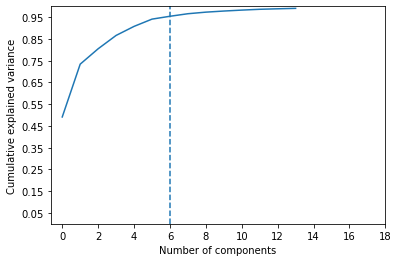

In [54]:
pca = PCA(n_components = .99, svd_solver = 'full')
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.yticks(np.arange(0.05, 1.1, step=.1))
plt.xticks(np.arange(0, 20, step=2))
plt.axvline(x=6, linestyle='--')
plt.ylim(0,1)

In [55]:
pca = PCA(n_components = 6)
princ_comps = pca.fit_transform(data)
data_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components_+1)])
data_pca.shape

(1070994, 6)

In [56]:
pca_mean = data_pca.mean()
pca_sd = data_pca.std()
data_pca = (data_pca - pca_mean) / pca_sd
data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,6.027998e-17,5.957101e-16,-9.923916e-17,5.532608e-16,5.955060e-17,-9.163094e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.423878e-02,-1.387192e+02,-4.465509e+02,-3.631832e+02,-3.499267e+02,-3.352532e+02
25%,-2.844246e-02,-6.242255e-02,-7.041944e-03,-8.103322e-02,-5.505850e-02,-3.206243e-02
50%,-1.044346e-02,-2.825168e-02,1.778053e-03,-3.531660e-03,-1.110123e-02,-1.197058e-03
75%,3.780854e-04,4.758923e-03,1.667827e-02,3.730556e-02,1.083305e-02,5.639547e-02
max,8.006021e+02,5.359121e+02,4.807969e+02,4.084298e+02,4.391587e+02,4.292598e+02


In [57]:
p=2
one_over_p = 1/p
score1 = (((data_pca).abs()**p).sum(axis=1))**one_over_p

In [58]:
from keras.models import Model
from keras.layers import Input, Dense
# placeholder for input
data_in = Input(shape=(6,))
# dimension of the encoded data. Choose 3
encoded_dim = 3
# encoded representation of the data
encoded = Dense(encoded_dim, activation='tanh')(data_in)
# reconstruction of the input
decoded = Dense(6,activation='tanh')(encoded)
# this model maps the input data to the reconstructed data
autoencoder = Model(data_in, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(data_pca,data_pca, epochs=5, shuffle=True, validation_data=(data_pca,data_pca))

pca_out = autoencoder.predict(data_pca)
error = pca_out - data_pca
p=2
oop=1/p
score2 = ((error.abs()**p).sum(axis=1))**oop

Epoch 1/5
33469/33469 [==============================] - 25s 739us/step - loss: 0.9328 - val_loss: 0.9761
Epoch 2/5
33469/33469 [==============================] - 24s 725us/step - loss: 0.9980 - val_loss: 0.9746
Epoch 3/5
33469/33469 [==============================] - 24s 726us/step - loss: 0.7515 - val_loss: 0.9745
Epoch 4/5
33469/33469 [==============================] - 24s 717us/step - loss: 1.2111 - val_loss: 0.9746
Epoch 5/5
33469/33469 [==============================] - 24s 713us/step - loss: 0.7465 - val_loss: 0.9744


In [59]:
scores = pd.DataFrame(score1)
scores.columns=['score1']
scores['score2'] = score2
scores['score1 rank'] = scores['score1'].rank()
scores['score2 rank'] = scores['score2'].rank()
scores['final'] = (scores['score1 rank'] + scores['score2 rank'])/2
top_records = scores.sort_values(['final'], ascending = False).head(20).index

(0.1, 2142747.525661616)

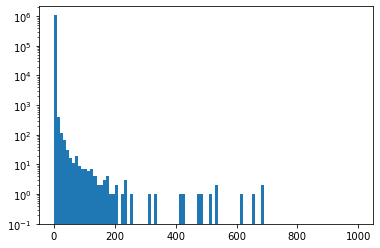

In [60]:
plt.hist(score1, bins=100, range=(0,1000))
plt.yscale('log')
plt.ylim(ymin=0.1)

(0.1, 2142982.9672979694)

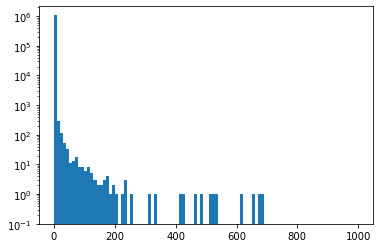

In [61]:
plt.hist(score2, bins=100, range=(0,1000))
plt.yscale('log')
plt.ylim(ymin=0.1)

/Users/haotian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


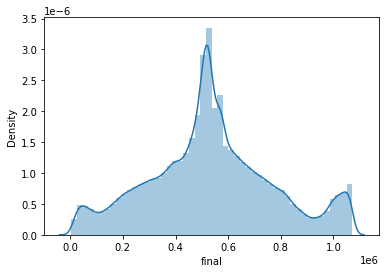

In [70]:
sns.distplot(scores['final'])

In [68]:
# load the original data file
df = pd.read_csv('NY property data.csv')

In [74]:
# combine the score and origianl dataset
new_score = scores.copy()
ranked = df.join(new_score)
output = ranked.sort_values(by='final', ascending=False).head(20)

In [79]:
output.to_csv('Data/top_20_ranked.csv')